In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
X, y = datasets.make_moons(n_samples=500, noise=0.3, random_state=666)

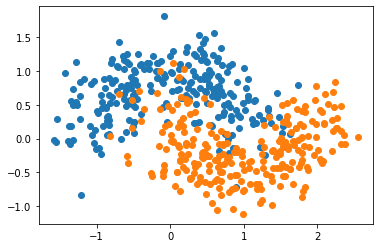

In [3]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [12]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [13]:
dt_clf.score(X_test, y_test)

0.856

In [14]:
%%time
from sklearn.model_selection import GridSearchCV

param_grid ={
            'criterion':['gini','entropy'],
            'max_depth':np.arange(1, 10, 1)
            }
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid)
grid_search.fit(X_train, y_train)

Wall time: 103 ms


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                

In [15]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 2}

In [16]:
grid_search.best_score_

0.8933333333333333

In [17]:
grid_search.score(X_test, y_test)

0.904